In [ ]:
# Uncomment and run this cell if you're on Colab or Kaggle
# !git clone https://github.com/nlp-with-transformers/notebooks.git
# %cd notebooks
# from install import *
# install_requirements(is_chapter11=True)

In [ ]:
#hide
from utils import *
setup_chapter()

2021-10-28 20:16:43.197022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 20:16:43.197062: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Using transformers v4.11.3
Using datasets v1.13.0
Using accelerate v0.5.1


# Future Directions

## Scaling Transformers

In [ ]:
#hide
model_data = [
    {'date': '12-06-2017', 'name': 'Transformer', 'size': 213*1e6},
    {'date': '11-06-2018', 'name': 'GPT', 'size': 110*1e6},
    {'date': '11-10-2018', 'name': 'BERT', 'size': 340*1e6},
    {'date': '14-02-2019', 'name': 'GPT-2', 'size': 1.5*1e9},
    {'date': '23-10-2019', 'name': 'T5', 'size': 11*1e9},
    {'date': '17-09-2019', 'name': 'Megatron', 'size': 8.3*1e9},
    {'date': '13-02-2020', 'name': 'Turing-NLG', 'size': 17*1e9},
    {'date': '30-06-2020', 'name': 'GShard', 'size': 600*1e9},
    {'date': '28-05-2020', 'name': 'GPT-3', 'size': 175*1e9},
    {'date': '11-01-2021', 'name': 'Switch-C', 'size': 1.571*10e12},
]

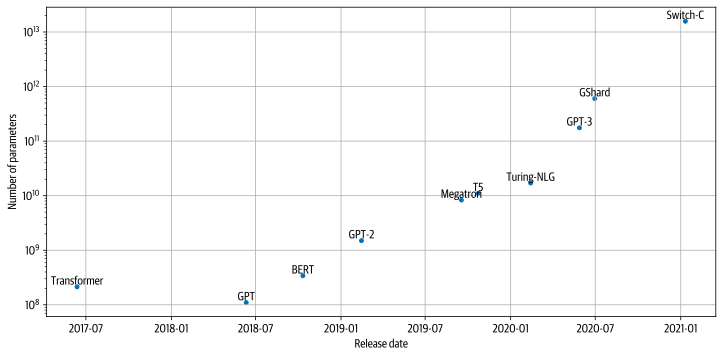

In [ ]:
#hide_input

#id parameter-counts
#alt Language model parameter counts
#caption Parameter counts over time for prominent Transformer architectures
import pandas as pd
import matplotlib.pyplot as plt


def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(
            point["x"],
            point["y"],
            str(point["val"]),
            horizontalalignment="center",
            verticalalignment="bottom",
        )


df_lm = pd.DataFrame.from_records(model_data)
df_lm["date"] = pd.to_datetime(df_lm["date"], dayfirst=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df_lm.plot(x="date", y="size", kind="scatter", s=15, ax=ax)
ax.set_yscale("log")
label_point(df_lm["date"], df_lm["size"], df_lm["name"], ax)
ax.set_xlabel("Release date")
ax.set_ylabel("Number of parameters")
ax.grid(True)
plt.subplots_adjust(top=1.2)
plt.show()

### Scaling Laws

<img alt="scaling-laws" caption="Power-law scaling of test loss versus compute budget (left), dataset size (middle), and model size (right) (courtesy of Jared Kaplan)" src="images/chapter11_scaling.png" id="scaling-laws"/>

<img alt="scaling-laws-modal" caption="Power law scaling of test loss versus compute budget across a wide range of modalities (courtesy of Tom Henighan)" src="images/chapter11_scaling-modal.png" id="scaling-laws-modal"/>

### Challenges with Scaling

### Attention Please!

### Sparse Attention

<img alt="Atomic sparsity patterns" caption="Common atomic sparse attention patterns for self-attention: a colored square means the  attention score is calculated, while a blank square means the score is discarded (courtesy of Tianyang Lin)" src="images/chapter11_atomic-sparse-attention.png" id="sparsity-atomic"/> 

<img alt="Attention with compound sparsity" caption="Sparse attention patterns for recent transformer models (courtesy of Tianyang Lin)" src="images/chapter11_compound-sparse-attention.png" id="sparsity-compound"/> 

### Linearized Attention

<img alt="Linear attention" caption="Complexity difference between standard self-attention and linearized self-attention (courtesy of Tianyang Lin)" src="images/chapter11_linear-attention.png" id="linear-attention"/>

## Going Beyond Text

### Vision

#### iGPT

<img alt="iGPT" width="800" caption="Examples of image completions with iGPT (courtesy of Mark Chen)" src="images/chapter11_iGPT.png" id="iGPT"/> 

#### ViT

<img alt="vit-architecture" width="800" caption="The ViT architecture (courtesy of Alexey Dosovitskiy et al.)" src="images/chapter11_vit-architecture.png" id="vit-architecture"/> 

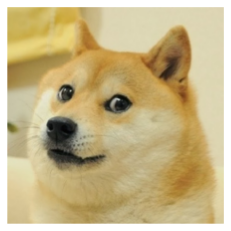

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from transformers import pipeline

image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

,score,label
0,0.643599,"Eskimo dog, husky"
1,0.207407,Siberian husky
2,0.060160,"dingo, warrigal, warragal, Canis dingo"
3,0.035359,"Norwegian elkhound, elkhound"
4,0.012927,"malamute, malemute, Alaskan malamute"


### Tables

<img alt="table-qa" width="800" caption="Question answering over a table (courtesy of Jonathan Herzig)" src="images/chapter11_table-qa.png" id="tapas-table"/>

<img alt="tapas-architecture" width="800" caption="Architecture of TAPAS (courtesy of Jonathan Herzig)" src="images/chapter11_tapas-architecture.png" id="tapas-architecture"/>

In [ ]:
book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12, 
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74, 
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121, 
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141, 
     "end_page": 144}
]

In [ ]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


In [ ]:
#hide_output
table_qa = pipeline("table-question-answering")

In [ ]:
#hide_output
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
           "What is the total number of pages?",
           "On which page does the chapter about question-answering start?",
           "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

In [ ]:
for query, pred in zip(queries, preds):
    print(query)
    if pred["aggregator"] == "NONE": 
        print("Predicted answer: " + pred["answer"])
    else: 
        print("Predicted answer: " + pred["answer"])
    print('='*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 10, 36, 24, 46, 19, 3
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


## Multimodal Transformers

### Speech-to-Text

<img alt="wav2vec2" width="800" caption="Architecture of wav2vec 2.0 (courtesy of Alexei Baevski)" src="images/chapter11_wav2vec2.png" id="wav2vec2"/>

In [ ]:
#hide_output
asr = pipeline("automatic-speech-recognition")

The model 'Wav2Vec2ForCTC' is not supported for automatic-speech-recognition. Supported models are [(<class 'transformers.models.speech_encoder_decoder.configuration_speech_encoder_decoder.SpeechEncoderDecoderConfig'>, <class 'transformers.models.speech_encoder_decoder.modeling_speech_encoder_decoder.SpeechEncoderDecoderModel'>), (<class 'transformers.models.speech_to_text.configuration_speech_to_text.Speech2TextConfig'>, <class 'transformers.models.speech_to_text.modeling_speech_to_text.Speech2TextForConditionalGeneration'>), (<class 'transformers.models.wav2vec2.configuration_wav2vec2.Wav2Vec2Config'>, <class 'transformers.models.wav2vec2.modeling_wav2vec2.Wav2Vec2ForCTC'>), (<class 'transformers.models.hubert.configuration_hubert.HubertConfig'>, <class 'transformers.models.hubert.modeling_hubert.HubertForCTC'>)].


In [ ]:
#hide_output
from datasets import load_dataset

ds = load_dataset("superb", "asr", split="validation[:1]")
print(ds[0])

{'chapter_id': 128104, 'speaker_id': 1272, 'file': '/home/lewtun/.cache/huggingf
ace/datasets/downloads/extracted/e4e70a454363bec1c1a8ce336139866a39442114d86a433
6014acd4b1ed55e55/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac',
'id': '1272-128104-0000', 'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE
CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL'}


In [ ]:
#hide_output
import soundfile as sf

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = ds.map(map_to_array)

In [ ]:
#hide_output
from IPython.display import Audio

display(Audio(ds[0]['speech'], rate=16000))

In [ ]:
ds.set_format("numpy")

In [ ]:
pred = asr(ds[0]["speech"])
print(pred)

{'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO
WELCOME HIS GOSPEL'}


<img alt="wav2vec-u" width="800" caption="Training scheme for wav2vec-U (courtesy of Alexsei Baevski)" src="images/chapter11_wav2vec-u.png" id="wav2vec-u"/>

### Vision and Text

#### VQA

<img alt="vqa" width="800" caption="Example of a visual question answering task from the VQA dataset (courtesy of Yash Goyal)" src="images/chapter11_vqa.png" id="vqa"/>

#### LayoutLM

<img alt="layoutlm" width="500" caption="The model architecture and pretraining strategies for LayoutLMv2 (courtesy of Yang Xu)" src="images/chapter11_layoutlm.png" id="layoutlm"/> 

#### DALL·E

<img alt="dall-e" width="800" caption="Generation examples with DALL·E (courtesy of Aditya Ramesh)" src="images/chapter11_dall-e.png" id="dall-e"/>

#### CLIP

<img alt="clip-arch" width="800" caption="Architecture of CLIP (courtesy of Alec Radford)" src="images/chapter11_clip-arch.png" id="clip-arch"/>

In [ ]:
#hide_output
from transformers import CLIPProcessor, CLIPModel

clip_ckpt = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(clip_ckpt)
processor = CLIPProcessor.from_pretrained(clip_ckpt)

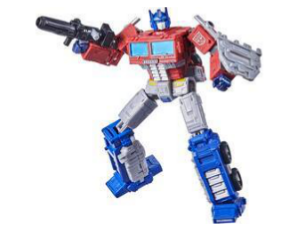

In [ ]:
image = Image.open("images/optimusprime.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
import torch

texts = ["a photo of a transformer", "a photo of a robot", "a photo of agi"]
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.9557, 0.0413, 0.0031]])

## Where to from Here?